# Regresión no lineal

Concluimos el capítulo 3 del libro ["Introduction to Statistical Learning"](http://www-bcf.usc.edu/~gareth/ISL/).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale, PolynomialFeatures
import sklearn.linear_model as skl_lm
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## Cargamos los datos

Cargamos los conjuntos de datos que vamos a usar

Los conjuntos de datos están en la web del libro (pero ya están descargados)
http://www-bcf.usc.edu/~gareth/ISL/data.html

Features:

 - Temperature (T)
 - Ambient Pressure (AP)
 - Relative Humidity (RH)
 - Exhaust Vacuum (V)
 
Goal: predict the net hourly electrical energy output (EP)

In [25]:
power = pd.read_csv('ENB2012_data.csv', na_values='?').dropna()
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 66.0 KB


In [26]:
power.describe()

X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    1.55096   10.090196    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25%      0.100000    1.75000   12.992500   15.620000  
50%      0.250000    3.00000   18.950000   22.080000  
75%      0.400000    4.00000   31.667500   33.132500  
max      0.400000    5.00000   43.100000   48.030000

In [27]:
power.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [28]:
regr = skl_lm.LinearRegression()

X = power[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = power[['Y1']]
regr.fit(X,y)
print(regr.score(X,y))

0.9160788834212615


In [30]:
'Y1 ~ %s'%('+'.join('X%d'%j for j in range(1,8)))

'Y1 ~ X1+X2+X3+X4+X5+X6+X7'

In [31]:
est = smf.ols('Y1 ~ X1+X2+X3+X4+X5+X6+X7', power).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1370.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:37:43   Log-Likelihood:                -1916.7
No. Observations:                 768   AIC:                             3847.
Df Residuals:                     761   BIC:                             3880.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.4692     19.126      4.416      0.000      46.922     122.016
X1           -64.7740     10.340     -6.264      0.000     -85.072     -44.476
X2            -0.0626      0.013     -4.647      0.000      -0.089      -0.036
X3             0.0361      0.004      9.340      0.000       0.029       0.044
X4            -0.0494      0.008     -6.537      0.000      -0.064      -0.035
X5             4.1699      0.340     12.277      0.000       3.503       4.837
X6            -0.0233      0.095     -0.245      0.806      -0.210       0.163
X7            20.4379      0.799     25.572      0.000      18.869      22.007
==============================================================================
Omnibus:                       20.735   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.929
Skew:                          -0.002   Prob(JB):                     1.75e-10
Kurtosis:                       4.185   Cond. No.                     1.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
est = smf.ols('Y1 ~ X1+X2+X3+X4+X5+X7', power).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1646.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:37:58   Log-Likelihood:                -1916.8
No. Observations:                 768   AIC:                             3846.
Df Residuals:                     762   BIC:                             3873.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.3876     19.112      4.415      0.000      46.870     121.906
X1           -64.7740     10.334     -6.268      0.000     -85.060     -44.488
X2            -0.0626      0.013     -4.650      0.000      -0.089      -0.036
X3             0.0361      0.004      9.346      0.000       0.029       0.044
X4            -0.0494      0.008     -6.541      0.000      -0.064      -0.035
X5             4.1699      0.339     12.285      0.000       3.504       4.836
X7            20.4379      0.799     25.588      0.000      18.870      22.006
==============================================================================
Omnibus:                       20.756   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.999
Skew:                          -0.002   Prob(JB):                     1.69e-10
Kurtosis:                       4.186   Cond. No.                     1.45e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
est = smf.ols('EP ~ T + V + AP + RH + ', power).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 4.132e+04
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:22:54   Log-Likelihood:                -28110.
No. Observations:                9568   AIC:                         5.623e+04
Df Residuals:                    9564   BIC:                         5.626e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    518.5489      0.388   1337.310      0.000     517.789     519.309
T             -2.0187      0.014   -144.495      0.000      -2.046      -1.991
V             -0.2281      0.007    -31.491      0.000      -0.242      -0.214
RH            -0.1654      0.004    -41.092      0.000      -0.173      -0.157
==============================================================================
Omnibus:                      901.476   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4143.993
Skew:                          -0.357   Prob(JB):                         0.00
Kurtosis:                       6.144   Cond. No.                         781.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
est = smf.ols('Y2 ~ X1+X2+X3+X4+X5+X7', power).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1203.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:38:38   Log-Likelihood:                -1980.2
No. Observations:                 768   AIC:                             3972.
Df Residuals:                     762   BIC:                             4000.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.7618     20.756      4.710      0.000      57.015     138.508
X1           -70.7877     11.223     -6.307      0.000     -92.819     -48.756
X2            -0.0661      0.015     -4.520      0.000      -0.095      -0.037
X3             0.0225      0.004      5.366      0.000       0.014       0.031
X4            -0.0443      0.008     -5.405      0.000      -0.060      -0.028
X5             4.2838      0.369     11.620      0.000       3.560       5.008
X7            14.8180      0.867     17.082      0.000      13.115      16.521
==============================================================================
Omnibus:                      104.896   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.225
Skew:                           0.766   Prob(JB):                     3.74e-51
Kurtosis:                       5.215   Cond. No.                     1.45e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Dibujar el modelo

El número $R^2$ es útil para decidir si el modelo ajusta correctamente, pero puede ser incluso más útil (si es posible) dibujar los datos junto con el ajuste para buscar un patrón. Si observamos dónde falla el modelo, podemos pensar cómo mejorarlo.

Por ejemplo, dibujamos la gráfica del ajuste lineal junto con los puntos.

In [6]:
est = smf.ols('displacement ~ horsepower + weight', power).fit()

adv = power.copy()
#Añadimos una columna con los residuos (con signo)
adv['res'] = power.resid
adv.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin           res  
count    392.000000  392.000000  392.000000  3.920000e+02  
mean      15.541327   75.979592    1.576531  1.366272e-12  
std        2.758864    3.683737    0.805518  3.258920e+01  
min        8.000000   70.000000    1.000000 -1.113856e+02  
25%       13.775000   73.000000    1.000000 -1.763328e+01  
50%       15.500000   76.000000    1.000000  1.494849e+00  
75%       17.025000   79.000000    2.000000  1.838163e+01  
max       24.800000   82.000000    3.000000  1.346673e+02

In [7]:
est.params

Intercept    -135.950735
horsepower      0.975714
weight          0.076717
dtype: float64

In [8]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
auto[['horsepower', 'weight']].describe()

horsepower       weight
count  392.000000   392.000000
mean   104.469388  2977.584184
std     38.491160   849.402560
min     46.000000  1613.000000
25%     75.000000  2225.250000
50%     93.500000  2803.500000
75%    126.000000  3614.750000
max    230.000000  5140.000000

In [12]:
# Create a coordinate grid
HP = np.linspace(40,130,100)
W = np.linspace(1500,6000,100)

B1, B2 = np.meshgrid(HP, W, indexing='xy')
Z = np.zeros((HP.size, W.size))

intercept, beta_HP, beta_W = est.params
for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(intercept + B1[i,j]*beta_HP + B2[i,j]*beta_W)

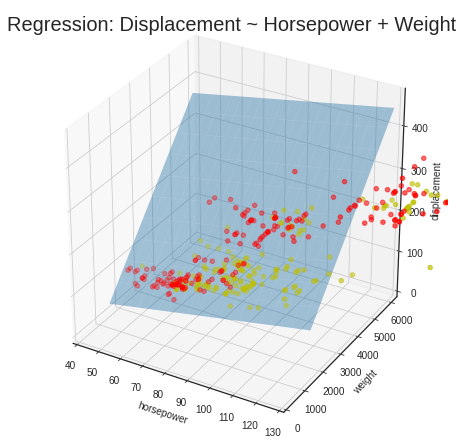

In [17]:
#interactive plot
%matplotlib inline 
# Create plot
fig = plt.figure(figsize=(6,6))
fig.suptitle('Regression: Displacement ~ Horsepower + Weight', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
adv_plus = adv[adv.res>0]
adv_minus = adv[adv.res<=0]
ax.scatter3D(adv_plus.horsepower, adv_plus.weight, adv_plus.displacement, c='r')
ax.scatter3D(adv_minus.horsepower, adv_minus.weight, adv_minus.displacement, c='y')

ax.set_xlabel('horsepower')
ax.set_xlim(40,130)
ax.set_ylabel('weight')
ax.set_ylim(bottom=0)
ax.set_zlabel('displacement');

Alternativamente, hacemos un dibujo 2d, donde las coordenadas (x,y) de un punto son los valores de inversión en TV y Radio, y el color es el residuo (el error cometido), con signo.

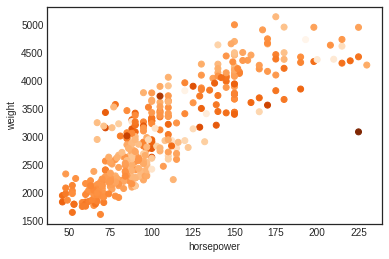

In [19]:
#non-interactive plot
%matplotlib inline 
#Color oscuro es un residuo negativo
#Color claro es un residuo positivo
plt.scatter(x=adv.horsepower, y=adv.weight, c=adv.res, cmap='Oranges')
plt.xlabel('horsepower')
plt.ylabel('weight')
plt.show()

### Comparación de modelos

Comparamos los modelos

$$
Sales =\beta_0 + \beta_1 TV + \beta_2 Radio
$$

y

$$
Sales =\beta_0 + \beta_1 TV + \beta_2 Radio + \beta_3 TV \cdot Radio
$$

In [21]:
est = smf.ols('displacement ~ horsepower + weight + horsepower*weight', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           displacement   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1205.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          3.44e-196
Time:                        09:11:38   Log-Likelihood:                -1921.3
No. Observations:                 392   AIC:                             3851.
Df Residuals:                     388   BIC:                             3866.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -126.0555     19.497     -6.465      0.000    -164.389     -87.722
horsepower            0.8633      0.227      3.803      0.000       0.417       1.310
weight                0.0740      0.006     11.487      0.000       0.061       0.087
horsepower:weight  2.958e-05   5.53e-05      0.535      0.593   -7.92e-05       0.000
==============================================================================
Omnibus:                       16.638   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.074
Skew:                          -0.075   Prob(JB):                     1.99e-09
Kurtosis:                       4.559   Cond. No.                     4.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
est = smf.ols('displacement ~ horsepower + weight', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           displacement   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1811.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          8.26e-198
Time:                        09:11:50   Log-Likelihood:                -1921.4
No. Observations:                 392   AIC:                             3849.
Df Residuals:                     389   BIC:                             3861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -135.9507      6.112    -22.243      0.000    -147.967    -123.934
horsepower     0.9757      0.085     11.423      0.000       0.808       1.144
weight         0.0767      0.004     19.820      0.000       0.069       0.084
==============================================================================
Omnibus:                       15.758   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.193
Skew:                          -0.112   Prob(JB):                     2.28e-08
Kurtosis:                       4.451   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelos de mayor grado

Ajustamos un modelo lineal a la relación entre el consumo (mpg, miles per galon) y la potencia (horsepower) de vehículos en USA. El modelo lineal no parece capturar bien la relación:

$$
mpg \approx \beta_0 + \beta_1\times hp + \varepsilon
$$

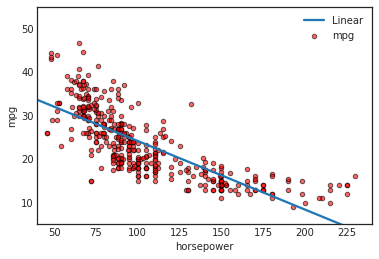

In [13]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='r', edgecolors='k', alpha=0.6, s=20) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

Vemos que un modelo cuadrático ajusta mucho mejor.
$$
mpg \approx \beta_0 + \beta_1\times hp + \beta_1\times hp^2 + \varepsilon
$$

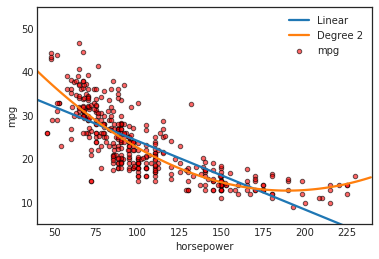

In [21]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='r', edgecolors='k', alpha=0.6, s=20) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

Sin embargo, aumentar el grado del polinomio hará que ajustemos demasiado bien el *"ruido"*. Este fenónemo se denomina **overfitting**.

- El modelo tiene un error bajo en nuestro conjunto de datos.
- Cuando intentamos aplicar el modelo a una observación que no pertenece al conjunto original, la predicción es descabellada.

> *Si ajustamos un modelo con más coeficientes que observaciones, el ajuste será perfecto, pero el modelo es inútil.*

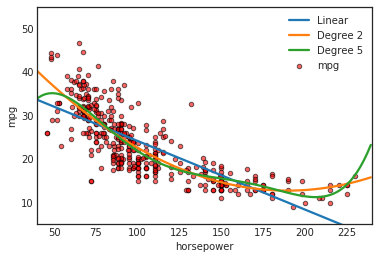

In [15]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='r', edgecolors='k', alpha=0.6, s=20) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

### Ajustar un modelo polinomial con scikit-learn

Para ajustar un modelo polinomial vamos a usar otra componente fundamental de ``scikit-learn``: el **preprocesado**, en este caso para conseguir las potencias de la columna ``horsepower``, usamos un objeto ``PolynomialFeatures``, que tiene un método ``fit_transform``, que aplicamos tanto al ajustar el modelo como al hacer predicciones:

```python
order=2
poly = PolynomialFeatures(order)
X = poly.fit_transform(auto[['horsepower']])
y = auto['mpg']

regr = skl_lm.LinearRegression()

regr.fit(X,y)

regr.predict(poly.fit_transform(250))
```

### Extrapolando con un modelo de orden alto

Probemos a usar los modelos polinomiales de distinto orden para predecir el valor de ``mpg`` para un coche de 250 HP de potencia.

In [63]:
for order in [1,2,3,4,5]:
    poly = PolynomialFeatures(order)
    X = poly.fit_transform(auto[['horsepower']])
    y = auto['mpg']

    regr = skl_lm.LinearRegression()

    regr.fit(X,y)

    print('grado',order,':', regr.predict(poly.fit_transform(250)))

grado 1 : [0.47467768]
grado 2 : [17.26119851]
grado 3 : [14.86942691]
grado 4 : [8.81659705]
grado 5 : [37.17567525]


Misma info, pero de forma gráfica:

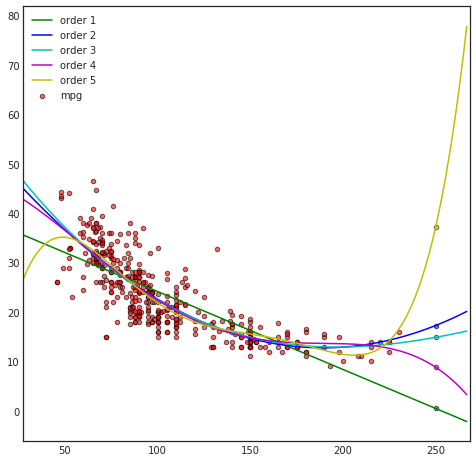

In [29]:
x_new = 250

Lx = max(auto.horsepower) - min(auto.horsepower)
xmin, xmax = min(auto.horsepower) - Lx/10, max(auto.horsepower) + Lx/10
xmax = max(xmax, x_new+Lx/10)


X = auto[['horsepower']]
y = auto['mpg']

plt.figure(figsize=(8,8))
plt.scatter(auto.horsepower, auto.mpg, facecolors='r', edgecolors='k', alpha=0.6, s=20)
colors = 'rgbcmyk'
for order in range(1,6):
    poly = PolynomialFeatures(order)
    X = poly.fit_transform(auto[['horsepower']])

    regr = skl_lm.LinearRegression()

    regr.fit(X,y)

    regr.predict(poly.fit_transform(250))

    #xs son puntos equiespaciados entre xmin y xmax
    xs = np.arange(xmin, xmax, Lx/100)
    #ys es el resultado de aplicar el modelo a cada punto de xs
    ys = regr.predict(poly.fit_transform(xs.reshape(-1,1)))
    #asi que plot(xs,ys) dibuja la grafica del modelo mpg = f(hp)
    plt.plot(xs, ys, 
             label='order %d'%order, 
             color=colors[order%(len(colors))])
    #Resaltamos la prediccion para hp=250
    plt.scatter([x_new], regr.predict(poly.fit_transform(x_new)), 
                facecolors=colors[order%(len(colors))],
                edgecolors='k', alpha=0.6, s=20)
    plt.legend()
#plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax);

### regplot con bandas de confianza

Hemos visto que los resultados al extrapolar dependen fuertemente del modelo escogido. Sin embargo, si usamos modelos de distinto orden para predecir el valor de ``mpg`` de un coche cuya potencia está dentro del rango de nuestro conjunto de datos los resultados no varían tanto.

Otra forma de saber si nos podemos fiar del modelo es pedir a ``regplot`` que dibuje bandas de error alrededor del modelo que ha ajustado. Estas bandas se obtienen mediante el método de **bootstrap**, que en vez de ajustar un modelo ajusta muchos, a distintos subconjuntos de los datos, y comprueba si todos esos modelos arrojan predicciones similares o dispares.

No le daremos más desarrollo, si a alguien le interesa esta idea, que pida más referencias, pero la información es muy visual:

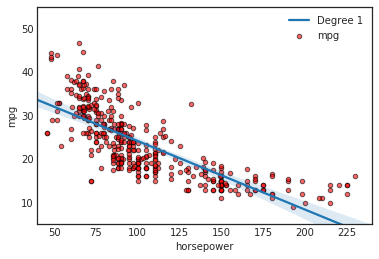

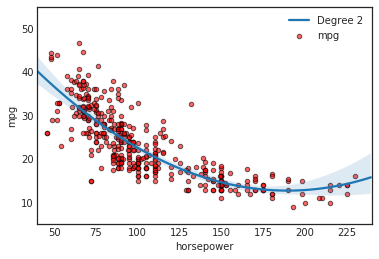

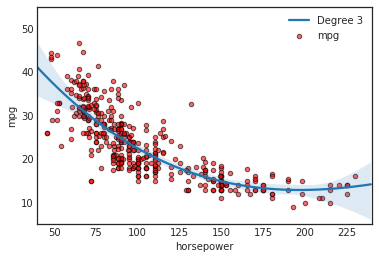

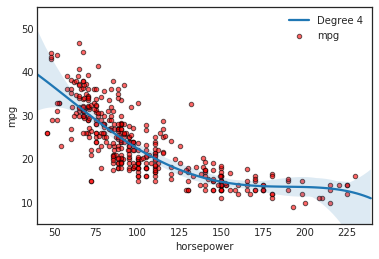

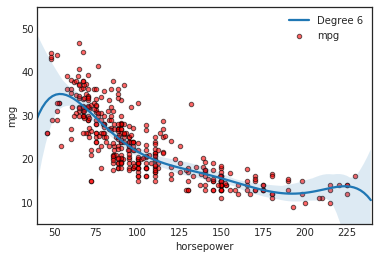

In [66]:
for order in [1,2,3,4,6]:
    plt.scatter(auto.horsepower, auto.mpg, facecolors='r', edgecolors='k', alpha=0.6, s=20) 
    sns.regplot(auto.horsepower, auto.mpg, ci=100, label='Degree %d'%order, order=order, scatter=False)
    plt.legend()
    plt.ylim(5,55)
    plt.xlim(40,240);
    plt.show()

> Observamos que las bandas de error se mantienen bajo control dentro del rango de los datos, pero se disparan cuando usamos el modelo para extrapolar.

## Conjuntos "train" y "test"

Vamos a hacer este análisis de forma un poco más sistemática, introduciendo además un concepto nuevo: los conjuntos de **entrenamiento (train set)** y **evaluación (test set)**:

 - **train set**: Se usa para ajustar el modelo.
 - **test set**: *No* se usa para ajustar el modelo, sino *únicamente* para comprobar el error que comete el modelo ajustado en el conjunto *train*.

> *¿Cómo los obtenemos?*

Antes de hacer el análisis, *dividimos nuestros datos en los dos conjuntos*:
 - Podemos asignar cada dato a ``train`` o a ``test`` **de forma aleatoria**.
 - Podemos asignar los datos a ``train`` o a ``test`` **siguiendo un criterio** concreto que tenga sentido. Por ejemplo, los datos hasta el 2017 son para train, y los datos de 2017 son para test. Puede tener sentido si vamos a usar el modelo para extrapolar.

In [24]:
# La funcion train_test_split reparte un conjunto en dos partes
# train y test, de forma aleatoria
from sklearn.model_selection import train_test_split

X = auto[['horsepower']]
y = auto['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25)

 - Entrenamos el modelo *sólo con el conjunto de entrenamiento*.
 - Calculamos el ``score`` (un **R-squared** ($R^2$) en este caso), *sólo con el conjunto de evaluación*.

Por ejemplo, para **regresión lineal**:

```python 
regr = skl_lm.LinearRegression()

regr.fit(X_train,y_train)

print(regr.score(X_test, y_test))
```

In [26]:
regr = skl_lm.LinearRegression()

regr.fit(X_train,y_train)

print(regr.score(X_test, y_test))

0.5484398220860272


Repetimos lo anterior para modelos de varios grados:

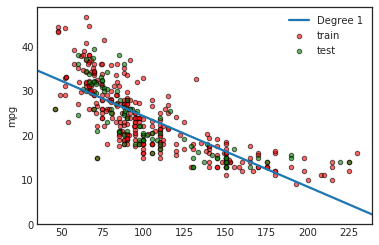

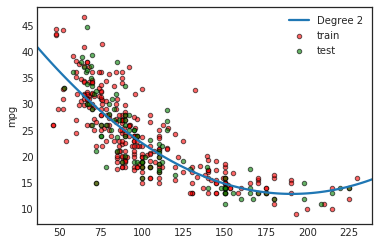

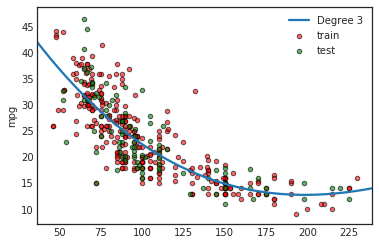

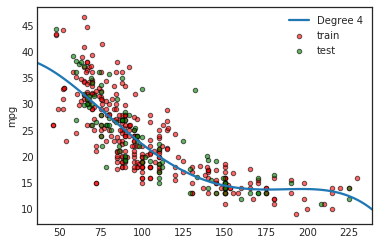

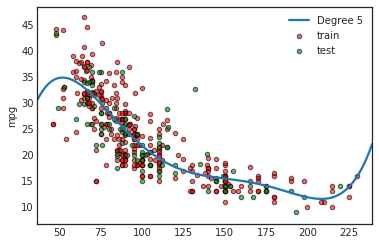

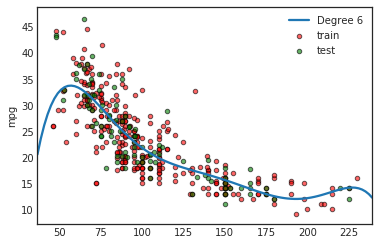

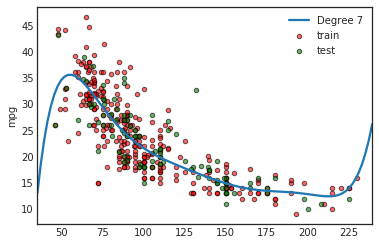

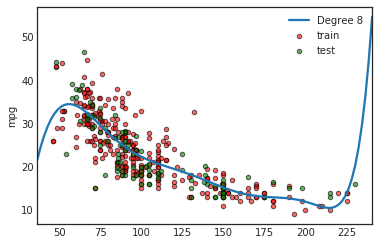

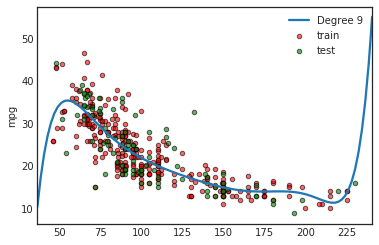

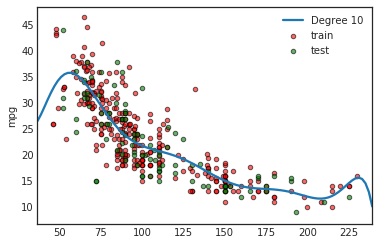

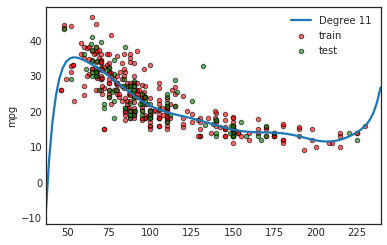

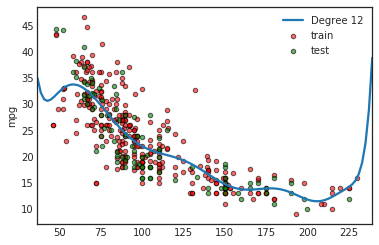

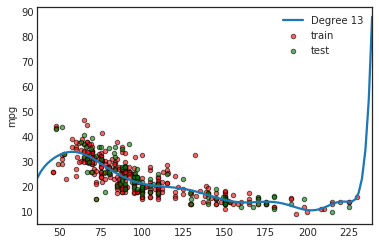

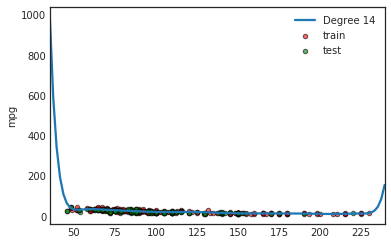

In [94]:
from sklearn.model_selection import train_test_split

max_order = 15

X = auto[['horsepower']].as_matrix()
y = auto['mpg']
for order in range(1,max_order):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25)
    plt.scatter(X_train[:,0], y_train, 
                facecolors='r', edgecolors='k', alpha=0.6, s=20,
                label='train')
    plt.scatter(X_test[:,0], y_test,
                facecolors='g', edgecolors='k', alpha=0.6, s=20,
                label='test')
    sns.regplot(X_train[:,0], y_train, ci=None, label='Degree %d'%order, order=order, scatter=False)
    plt.legend()
    plt.show()

Medimos esta información de forma numérica, pero en vez de quedarnos con una descomposición (train, test), repetimos N veces y tomamos el promedio de los scores. No es muy fino, pero nos da una idea:

In [97]:
from sklearn.model_selection import train_test_split

#
N = 40
max_order = 20

y = auto['mpg']

for order in range(1,max_order):
    poly = PolynomialFeatures(order)
    X = poly.fit_transform( auto[['horsepower']])
    sum_scores = 0
    sum_scores2 = 0
    for _ in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.25)
        regr = skl_lm.LinearRegression()
        regr.fit(X_train,y_train)
        sum_scores += regr.score(X_test, y_test)
    print(order,':',sum_scores/N)

1 : 0.5905087832479661
2 : 0.6778278779831438
3 : 0.670720145639733
4 : 0.6722524850680361
5 : 0.6850340934039583
6 : 0.6751751756699904
7 : 0.6665963901565444
8 : 0.6784132564841149
9 : 0.6741922390273702
10 : 0.6886877604284519
11 : 0.6825597102754466
12 : 0.5901415305767543
13 : 0.5165222114901808
14 : 0.4603185530559751
15 : 0.4149086137007668
16 : 0.3086703364541207
17 : 0.26160786621915866
18 : 0.13631640297895387
19 : -0.020202657895286413


Observamos que el modelo no aumenta su poder predictivo de forma significativa cuando aumentamos el orden del modelo por encima de 2, aunque el score no decae de forma severa hasta que no llegamos a orden 10, aproximadamente.

Sin embargo, si pensamos usar el modelo para extrapolar, es importante comprobar que el modelo funcione bien cuando extrapolamos, y para ello *no debemos elegir el conjunto de test al azar*.

Observemos qué ocurre si tomamos como conjunto de test los 40 vehículos de mayor potencia.

In [114]:
auto = auto.sort_values(by='horsepower')

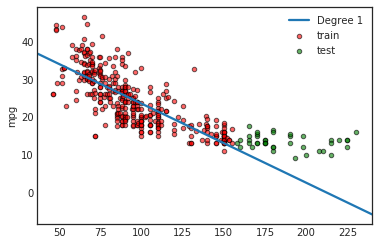

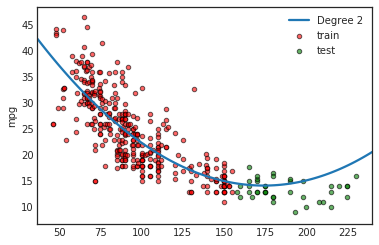

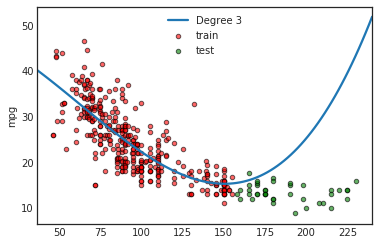

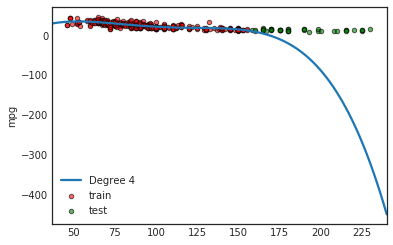

In [186]:
max_order = 5
split_index = len(auto) - 40

X = auto[['horsepower']].as_matrix()
y = auto['mpg']
for order in range(1,max_order):
    X_train, X_test = X[:split_index,:], X[split_index:,:]
    y_train, y_test = y[:split_index], y[split_index:]
    plt.scatter(X_train[:,0], y_train, 
                facecolors='r', edgecolors='k', alpha=0.6, s=20,
                label='train')
    plt.scatter(X_test[:,0], y_test,
                facecolors='g', edgecolors='k', alpha=0.6, s=20,
                label='test')
    sns.regplot(X_train[:,0], y_train, ci=None, label='Degree %d'%order, order=order, scatter=False)
    plt.legend()
    plt.show()

Calculamos el $R^2$ score cuando entrenamos con los 352 primeros vehículos e intentamos predecir el mpg de los 40 vehículos de mayor potencia.

In [203]:
max_order = 10
split_index = len(auto) - 40

y = auto['mpg']

for order in range(1,max_order):
    poly = PolynomialFeatures(order)
    X = poly.fit_transform( auto[['horsepower']])
    X_train, X_test = X[:split_index,:], X[split_index:,:]
    y_train, y_test = y[:split_index], y[split_index:]
    regr = skl_lm.LinearRegression()
    regr.fit(X_train,y_train)
    print(order,':',regr.score(X_test, y_test))

1 : -23.038345310870877
2 : -1.3640523137432226
3 : -43.80800380837972
4 : -4298.648436597214
5 : -5618.724277677634
6 : -73248.47232344357
7 : -94290.18716814363
8 : -5168.850332741586
9 : -2263926.456307164



**Las puntuaciones son negativas**, mientras que antes eran superiores al 50% incluso para orden muy alto.

 - Predecir el futuro en base a los datos pasados es mucho más difícil que hacer predicciones para un valor intermedio.
 - Puntuación negativa sólo quiere decir que si supiéramos la media de consumo de los 40 vehículos de mayor potencia, podríamos hacer una predicción mejor que con nuestro modelo, que tiene orden mayor, pero que se ha entrenado exclusivamente con vehículos de menor potencia. No es una comparación justa.
 - Lo relevante es que la predicción mejora al pasar de un modelo de orden 1 a un modelo de orden 2, pero empeora si seguimos aumentado el orden del modelo.

### Ejercicio 1

 - Carga el conjunto ``seaice.csv``, sobre la extensión del hielo polar.
 - Selecciona sólo los datos de extensión del hielo en el hemisferio norte.
 - Intenta explicar los datos de extensión del hielo polar en función del año y el mes, tomando el mes como variable categórica.
 - Añade a lo anterior el año al cuadrado como variable explicativa, para tener un modelo cuadrático del año, y manteniendo el mes como variable categórica. ¿Qué signo tiene el coeficiente del término año al cuadrado? ¿Puedes interpretar el signo de este coeficiente como una indicación de que la pérdida de hielo en el ártico se está acelerando o se está frenando?
 - Usa el modelo cuadrático para extrapolar la extensión del hielo en el Oceáno Ártico en Agosto de 2030, 2040 y 2050. Compara el resultado con los obtenidos para el modelo lineal.

**Sugerencia**: Usa statsmodel y `... + C(nombre_variable) + ...` para convertir una variable entera en categórica, como hiciste la semana pasada.

In [118]:
ice = pd.read_csv('seaice.csv')
ice.head()

Year  Month  Day  Extent  Missing  \
0  1978     10   26  10.231      0.0   
1  1978     10   28  10.420      0.0   
2  1978     10   30  10.557      0.0   
3  1978     11    1  10.670      0.0   
4  1978     11    3  10.777      0.0   

                                         Source Data hemisphere  
0  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
1  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
2  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
3  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north  
4  ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...      north

### Ejercicio 2

 - Sobre el mismo dataset ``seaice.csv``.
 - Selecciona sólo los datos de extensión del hielo en el hemisferio norte y sólo los datos de los meses de Agosto.
 - Ajusta modelos polinomiales que expliquen la extensión del hielo Ártico en Agosto, en función del año, pero de distintos órdenes.
 - Divide los datos en conjuntos ``train`` y ``test``, de modo que ``train`` contenga entradas hasta una cierta fecha (2005, por ejemplo), y ``test`` contenga el resto. Decide cuál es el orden para el que el modelo extrapola mejor.

### Ejercicio 3

 - Carga el conjunto ``yacht.csv``, sobre características hidrodinámicas de ciertos cascos de yate medidas en canal de ensayos.
 - Ajusta un modelo lineal para la resistencia, usando como única variable explicativa el número de Froude.
 - Ajusta un modelo polinómico para la resistencia, usando como única variable explicativa el número de Froude.
 - Ajusta un modelo lineal para el logaritmo de la resistencia, usando como única variable explicativa el número de Froude.
 - Compara de alguna manera los modelos anteriores.

In [30]:
yacht = pd.read_csv('yacht_hydrodynamics.csv')

## Glosario en inglés

- **regresión**: *regression*
- **sobreajuste**: *overfitting*
- **conjunto de entrenamiento**: *train set*
- **conjunto de validación**: *test set*
- **ajustar un modelo**: *fit a model*
- **hacer predicciones**: *make predictions*
